<a href="https://colab.research.google.com/github/jduell12/DS-Unit-2-Linear-Models/blob/master/C_211_guided_project_notes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lambda School Data Science - Unit 2 Sprint 1 Module 1

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import mean_absolute_error

In [ ]:
import sys

DATA_PATH = 'https://raw.githubusercontent.com/LambdaSchool/DS-Unit-2-Applied-Modeling/master/data/'

# I. Wrangle Data

In [ ]:
df = pd.read_csv(DATA_PATH + 'condos/tribeca.csv')
df.head()

,NEIGHBORHOOD,BUILDING_CLASS_CATEGORY,ADDRESS,APARTMENT_NUMBER,ZIP_CODE,GROSS_SQUARE_FEET,YEAR_BUILT,SALE_PRICE,SALE_DATE
0,TRIBECA,13 CONDOS - ELEVATOR APARTMENTS,"181 HUDSON STREET, 6D",6D,10013.0,1840.0,1909.0,2800000,2019-01-03
1,TRIBECA,13 CONDOS - ELEVATOR APARTMENTS,"10 LITTLE WEST STREET, 19A",19A,10004.0,1759.0,0.0,2650000,2019-01-07
2,TRIBECA,13 CONDOS - ELEVATOR APARTMENTS,"30 LITTLE WEST STREET, 7G",7G,10004.0,1190.0,2005.0,1005000,2019-01-09
3,TRIBECA,13 CONDOS - ELEVATOR APARTMENTS,"2 RIVER TERRACE, 4C",4C,0.0,1088.0,2006.0,1678000,2019-01-10
4,TRIBECA,13 CONDOS - ELEVATOR APARTMENTS,"380 RECTOR PLACE, 10A",10A,10280.0,873.0,0.0,1380000,2019-01-11


In [ ]:
df.shape

(90, 9)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90 entries, 0 to 89
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   NEIGHBORHOOD             90 non-null     object 
 1   BUILDING_CLASS_CATEGORY  90 non-null     object 
 2   ADDRESS                  90 non-null     object 
 3   APARTMENT_NUMBER         90 non-null     object 
 4   ZIP_CODE                 90 non-null     float64
 5   GROSS_SQUARE_FEET        90 non-null     float64
 6   YEAR_BUILT               90 non-null     float64
 7   SALE_PRICE               90 non-null     int64  
 8   SALE_DATE                90 non-null     object 
dtypes: float64(3), int64(1), object(5)
memory usage: 6.5+ KB


In [ ]:
df['NEIGHBORHOOD'].value_counts()

TRIBECA    90
Name: NEIGHBORHOOD, dtype: int64

Instead of reading data and changing as you go you can create a wrangle function to use. 

#Clean the Data
* Year Built is a float and should be whole integer
* Zip code is a float and should a whole integer 
* Look at value counts of Neighborhood since it looks like they are all the same
* Look at Building Class Category is the same 

Constant Values:
- Building_Class_Category
- Neighborhood

Constant Values are not helpful for the model since the model needs changing data to be able to learn and not constant data 

In [ ]:
def wrangle(filepath):
  df = pd.read_csv(filepath, dtype={'ZIP_CODE': int, 'YEAR_BUILT':int}, parse_dates=['SALE_DATE'], index_col='SALE_DATE')
  # Replace 0 with NAN
  df.replace(0, np.nan, inplace=True)
  # Drop constant-value and high cardinality columns 
  drop_cols = ['NEIGHBORHOOD', 'BUILDING_CLASS_CATEGORY', 'ADDRESS', 'APARTMENT_NUMBER']
  df.drop(columns=drop_cols, inplace=True)
  return df 

In [ ]:
df = wrangle(DATA_PATH + 'condos/tribeca.csv')
df.head()

,ZIP_CODE,GROSS_SQUARE_FEET,YEAR_BUILT,SALE_PRICE
SALE_DATE,,,,
2019-01-03,10013.0,1840.0,1909.0,2800000
2019-01-07,10004.0,1759.0,NaN,2650000
2019-01-09,10004.0,1190.0,2005.0,1005000
2019-01-10,NaN,1088.0,2006.0,1678000
2019-01-11,10280.0,873.0,NaN,1380000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 90 entries, 2019-01-03 to 2019-04-30
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ADDRESS            90 non-null     object 
 1   APARTMENT_NUMBER   90 non-null     object 
 2   ZIP_CODE           86 non-null     float64
 3   GROSS_SQUARE_FEET  90 non-null     float64
 4   YEAR_BUILT         72 non-null     float64
 5   SALE_PRICE         90 non-null     int64  
dtypes: float64(3), int64(1), object(2)
memory usage: 4.9+ KB


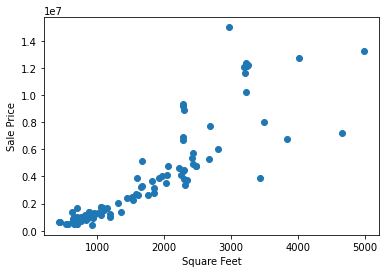

In [ ]:
plt.scatter(df['GROSS_SQUARE_FEET'], df['SALE_PRICE'])
plt.xlabel('Square Feet')
plt.ylabel('Sale Price');

Appears to be a strong positive correlation between square feet and price. 

As square feet increases the price increases by a certain amount. 

Put the line on the chart via the slope intercept formula:
y = mx + b 

Change into:
y = B$_0$ + B$_1$x

y = sale price

x = square feet 

B$_0$ = coefficient 

B$_1$ = coefficient 

# II. Split Data

Split our dataset into a **feature matrix `X`** and a **target vector `y`**.

In [ ]:
# feature matrix should be 2D
X = df[['GROSS_SQUARE_FEET']]
# target vector should be 1D
y = df['SALE_PRICE']

In [ ]:
X.shape

(90, 1)

In [ ]:
X.head()

,GROSS_SQUARE_FEET
SALE_DATE,
2019-01-03,1840.0
2019-01-07,1759.0
2019-01-09,1190.0
2019-01-10,1088.0
2019-01-11,873.0


In [ ]:
y.shape

(90,)

In [ ]:
y.head()

SALE_DATE
2019-01-03    2800000
2019-01-07    2650000
2019-01-09    1005000
2019-01-10    1678000
2019-01-11    1380000
Name: SALE_PRICE, dtype: int64

# III. Establish Baseline

If you had a *naïve model* that could only predict one value, how well would you model perform?

In [ ]:
y_pred = [y.mean()] * len(y)

In [ ]:
baseline_mae = ...
print('Mean Sale Price', y.mean())
print('Baseline MAE:', mean_absolute_error(y, y_pred))

Mean Sale Price 3928736.3666666667
Baseline MAE: 2783380.1977777784


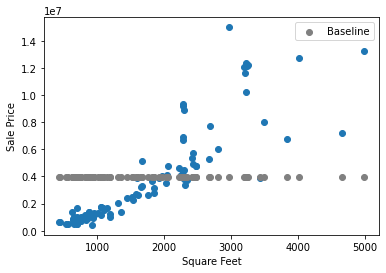

In [ ]:
plt.scatter(df['GROSS_SQUARE_FEET'], df['SALE_PRICE'])
plt.scatter(df['GROSS_SQUARE_FEET'], y_pred, color='grey', label='Baseline')
plt.xlabel('Square Feet')
plt.ylabel('Sale Price');
plt.legend()

# IV. Build Model

In [ ]:
# Step 1: Import predictor Class
from sklearn.linear_model import LinearRegression

In [ ]:
# Step 2: Instantiate my predictor
model = LinearRegression()

In [ ]:
# Step 3: FIT my predictor on the (training) data
model.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

# V. Check Metrics

In [ ]:
y_pred = model.predict(X)
training_mae = mean_absolute_error(y, y_pred)
print('Training MAE:', training_mae)

Training MAE: 1176817.9930150746


Model is off by less Money than the naive model which means it is a better model.

# VI. Communicate Results

Plot model

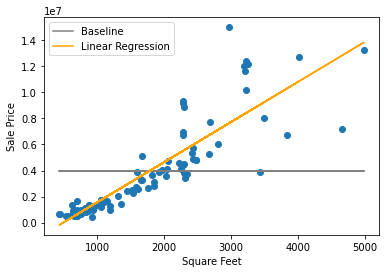

In [ ]:
plt.scatter(df['GROSS_SQUARE_FEET'], df['SALE_PRICE'])
plt.plot(df['GROSS_SQUARE_FEET'], [y.mean()]*len(y), color='grey', label='Baseline')
plt.plot(X, model.predict(X), color='orange', label='Linear Regression')
plt.xlabel('Square Feet')
plt.ylabel('Sale Price');
plt.legend()

What are our beta coefficients?

In [ ]:
model.coef_

array([3076.44765542])

In [ ]:
model.intercept_

-1505364.0408585514

In [ ]:
B_0 = -1505364.04 # model.coef_
B_1 = 3076.45 #model.intercept_

In [ ]:
print(f'SALE PRICE = {B_0} + {B_1}*SQAURE FEET')

SALE PRICE = -1505364.04 + 3076.45*SQAURE FEET
